In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from datetime import date, datetime, timedelta
import os
from newsapi.newsapi_client import NewsApiClient
import alpaca_trade_api as tradeapi

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Set News API Key
newsapi = NewsApiClient(api_key=os.getenv("NEWS_API_KEY"))

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [8]:
# TODO
# Selecting the tickers can be a stand-alone function
# Set the ticker
tickers = ["AAPL", "AMZN", "GOOGL", "NFLX"]

# Set timeframe to '1D'
timeframe = '1D'

# Get current date and the date from one month ago
current_date = date.today()
past_date = date.today() - timedelta(weeks=52)

df = pd.DataFrame()

# Get historical data for AAPL
for tick in tickers:
    tmp_df = api.get_barset(
        tick,
        timeframe,
        limit=365,
        start=current_date,
        end=past_date,
        after=None,
        until=None,
    ).df
    tmp_df = tmp_df.droplevel(0, axis=1)
    tmp_df.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
    tmp_df.rename({'close': tick}, axis=1, inplace=True)
    df = pd.concat([df, tmp_df], axis=1)

df.head()

,AAPL,AMZN,GOOGL,NFLX
time,,,,
2019-01-16 00:00:00-05:00,154.9100,1681.9703,1088.210,350.7639
2019-01-17 00:00:00-05:00,155.5300,1691.3700,1098.150,353.8200
2019-01-18 00:00:00-05:00,156.5700,1693.2421,1105.400,338.9200
2019-01-22 00:00:00-05:00,152.9300,1628.3980,1074.540,324.5401
2019-01-23 00:00:00-05:00,153.6799,1636.5500,1082.815,321.5900


In [10]:
df.index = df.index.date

In [11]:
df.tail()

,AAPL,AMZN,GOOGL,NFLX
2020-06-22,358.93,2712.00,1450.44,468.0800
2020-06-23,366.37,2764.42,1464.18,465.9400
2020-06-24,360.06,2733.49,1432.17,457.6500
2020-06-25,364.88,2756.16,1441.15,466.1400
2020-06-26,359.41,2748.81,1394.89,452.6001


In [12]:
aapl_df = df.loc[:, 'AAPL'].to_frame()

In [13]:
aapl_df['Shift'] = aapl_df['AAPL'].shift()

In [14]:
aapl_df.dropna(inplace=True)

In [15]:
aapl_df.head()

,AAPL,Shift
2019-01-17,155.5300,154.9100
2019-01-18,156.5700,155.5300
2019-01-22,152.9300,156.5700
2019-01-23,153.6799,152.9300
2019-01-24,152.6300,153.6799


In [16]:
# X = aapl_df['AAPL'].copy()
# y = aapl_df['Shift']

In [17]:
X = aapl_df.AAPL.values.reshape(-1, 1)
y = aapl_df.Shift.values.reshape(-1, 1)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea3b56cd90>],
      dtype=object)

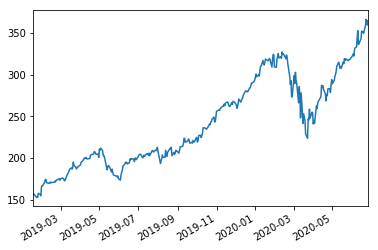

In [20]:
aapl_df.AAPL.plot(subplots=True)